In [2]:
%%capture

import importlib
from shapely.geometry import Polygon
from shapely.geometry.polygon import orient
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import device_geo as geo
importlib.reload(geo)


In [3]:
bar_points = [(0,0),(1,0),(1,1),(0,1)]
feat_1 = geo.Feature(bar_points)

feat_2 = geo.Feature(bar_points)
feat_2.rotate_and_offset(2, 2, 0)

feat_3 = geo.Feature(bar_points)
feat_3.rotate_and_offset(2.5, 2.5, 0)

feat_4 = geo.Feature(bar_points)
feat_4.scale(2,2)

In [4]:
dev = geo.Device()
for feat in [feat_1, feat_2, feat_3]:
    dev.register_feature(feat,0)
    
dev.register_feature(feat_4,1)
dev.heal()




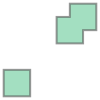

In [5]:
dev.device[0].poly

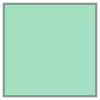

In [6]:
dev.device[1].poly

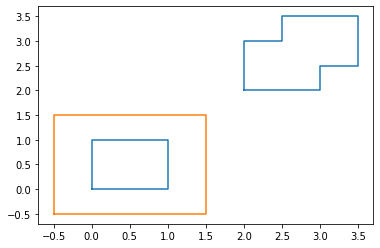

In [7]:
fig = dev.gen_fig()
fig.show()

In [8]:
list(dev.features[0][0].poly.exterior.coords)

[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]

In [9]:
list(dev.device[0].poly[0].exterior.coords)

[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]

In [10]:
dev.write_dxf()